In [1]:
 !pip install pycaret

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error, f1_score


In [3]:
data_path='https://drive.google.com/uc?export=download&id=1A3MUldrs0z09DlYR6Y1utfySwKNO9Qsz'
data_df = pd.read_csv(data_path)
data_df.head(10)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
7,6001,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8,1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [4]:
data_df['SeniorCitizen'] = data_df['SeniorCitizen'].astype(str)

In [7]:
data_df['TotalCharges'] = data_df['TotalCharges'].apply(lambda x:"0" if x == " " else x)
data_df['TotalCharges'] = data_df['TotalCharges'].astype('float')

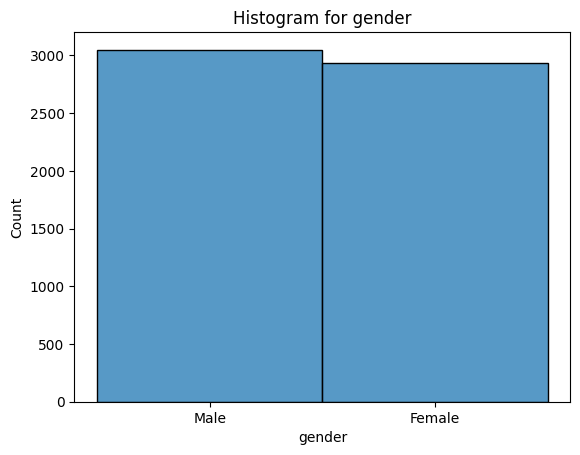

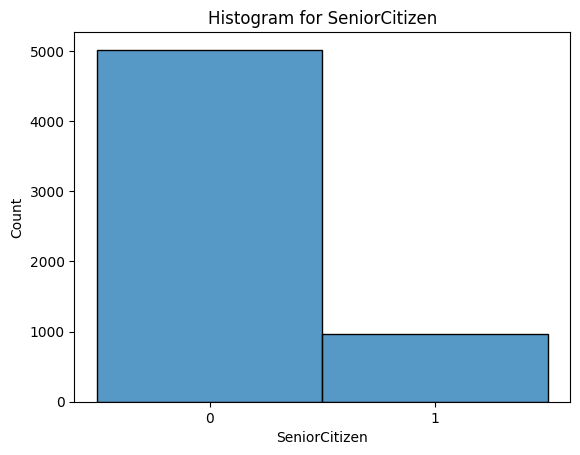

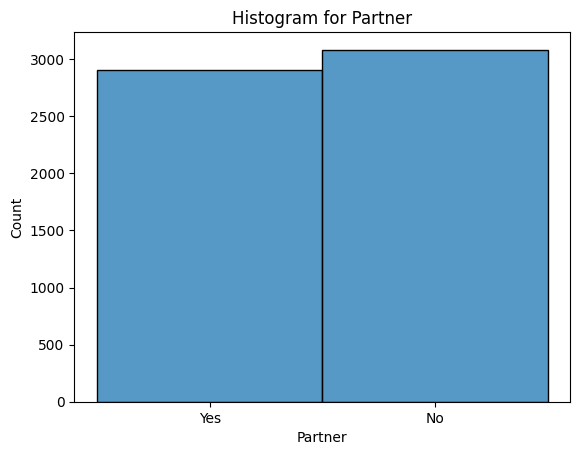

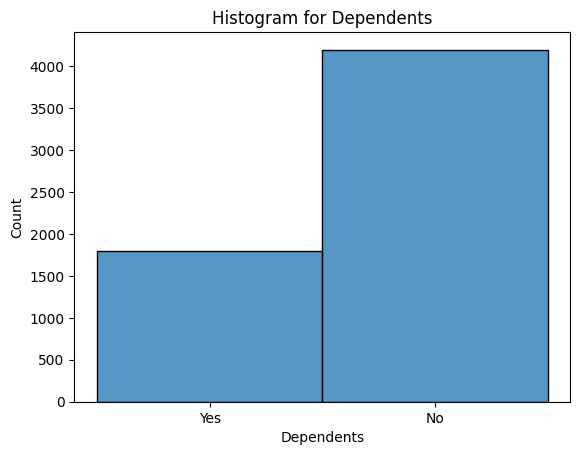

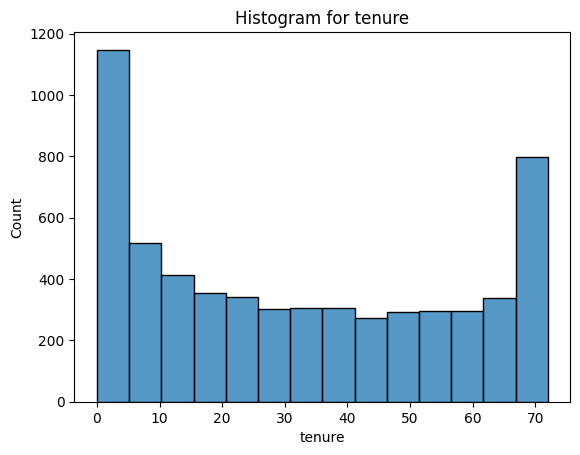

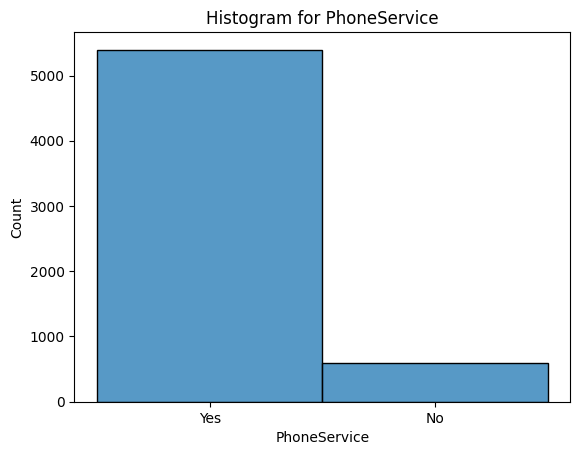

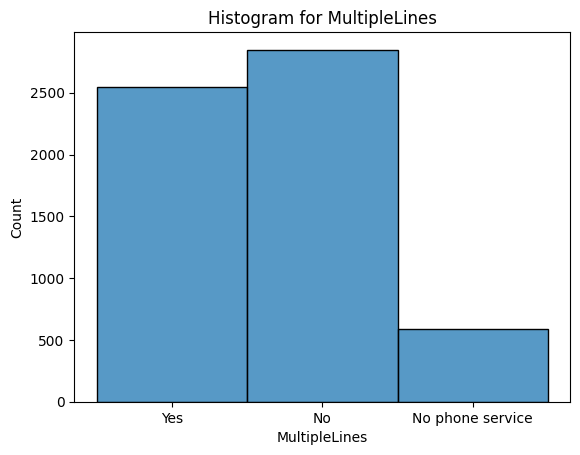

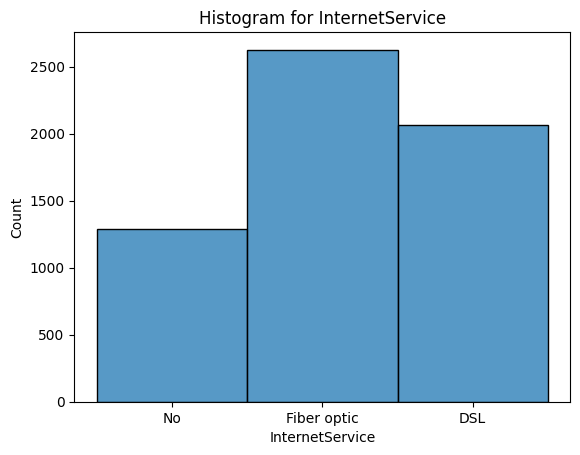

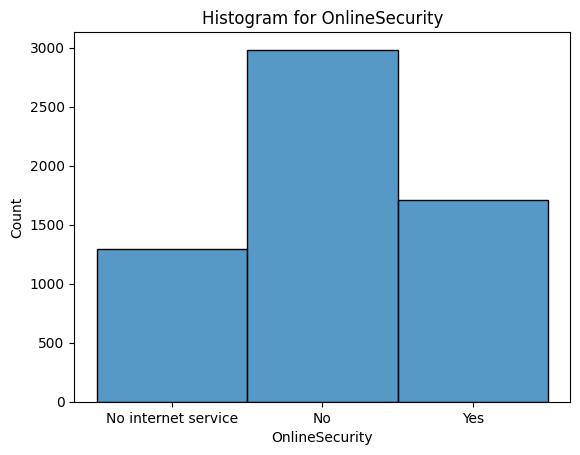

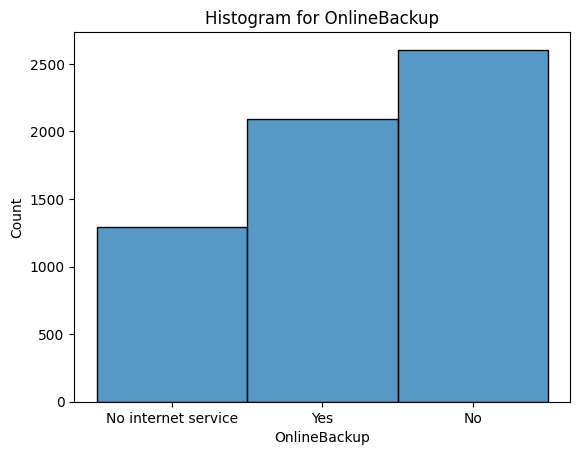

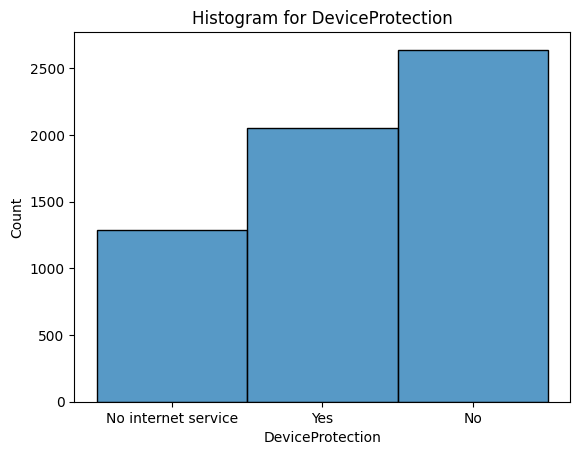

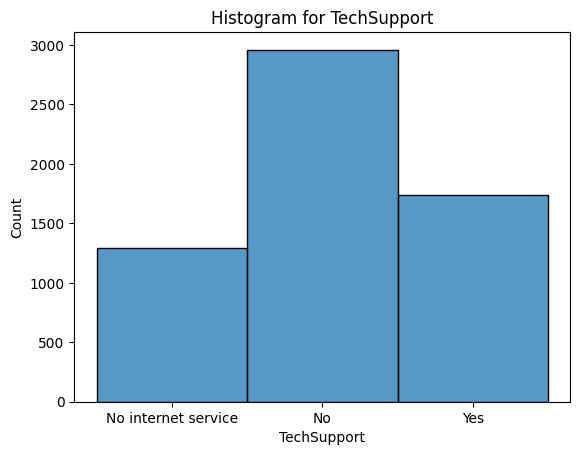

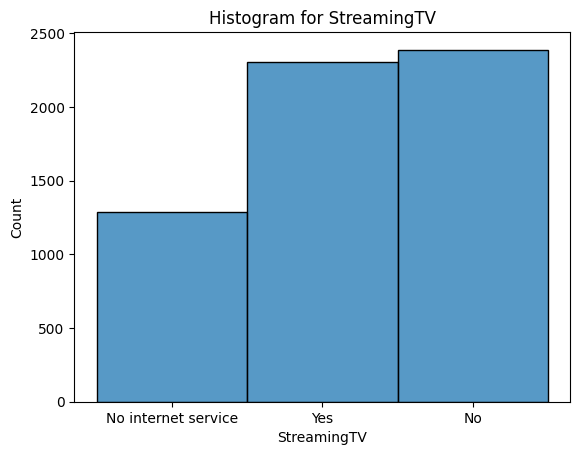

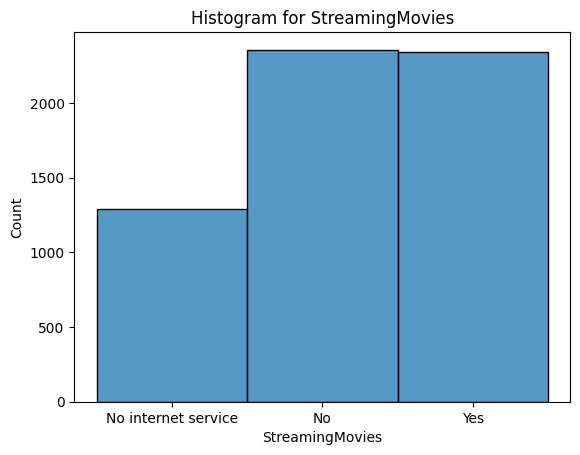

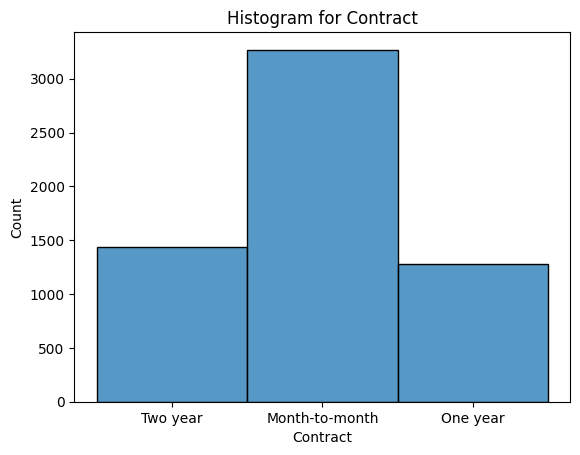

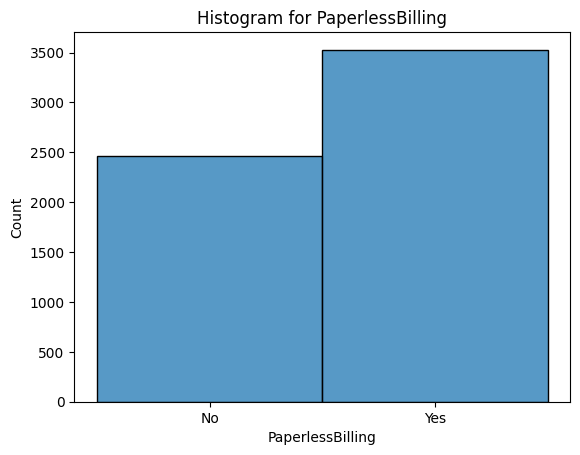

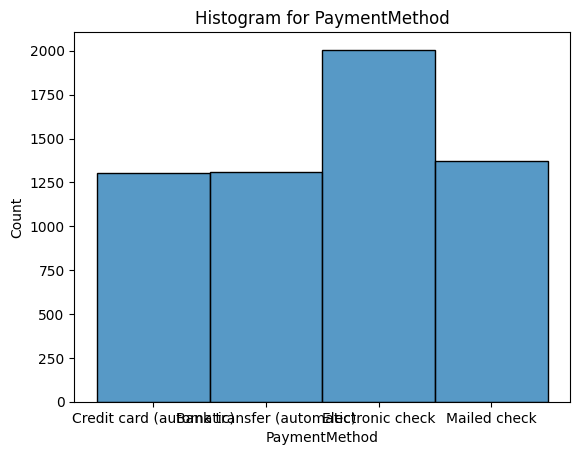

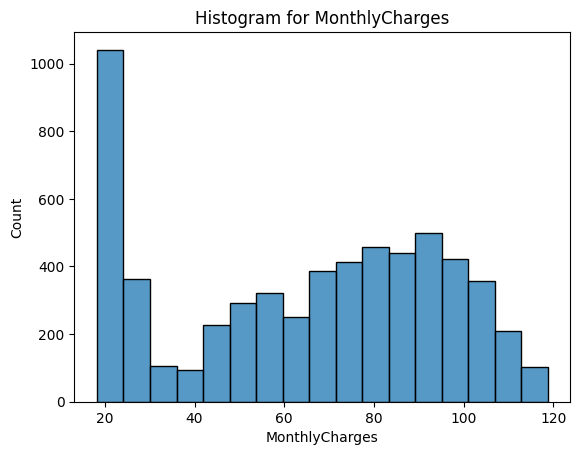

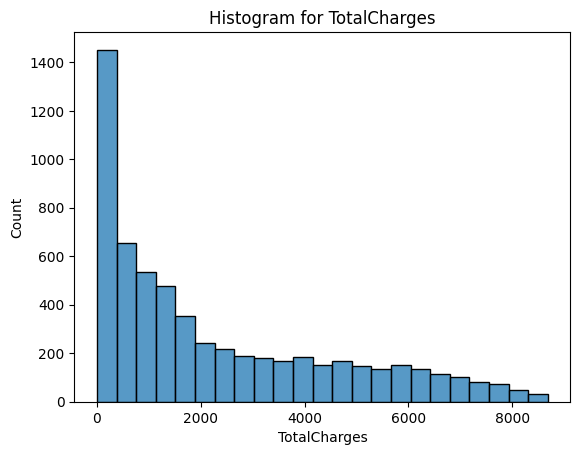

In [8]:
# Assuming dta_df is your DataFrame
# Create a histogram for each column
for column in data_df.drop(columns=['customerID', 'Unnamed: 0', 'Churn']).columns:
    sns.histplot(data_df[column], )
    plt.title(f'Histogram for {column}')
    plt.show()

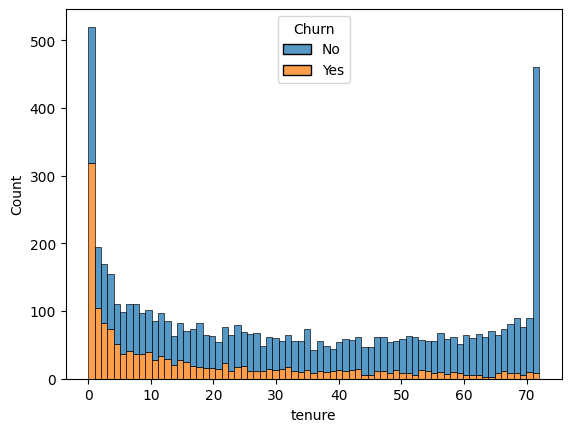

In [9]:
sns.histplot(data=data_df, x='tenure', bins=71, hue='Churn', multiple='stack')
plt.show()

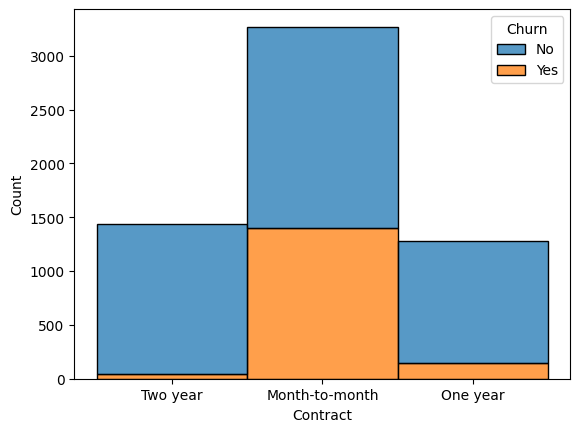

In [10]:
sns.histplot(data=data_df, x='Contract', bins=71, hue='Churn', multiple='stack')
plt.show()

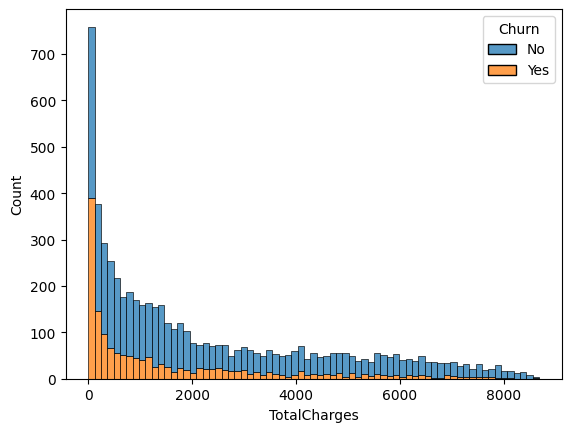

In [11]:
sns.histplot(data=data_df, x='TotalCharges', bins=71, hue='Churn', multiple='stack')
plt.show()

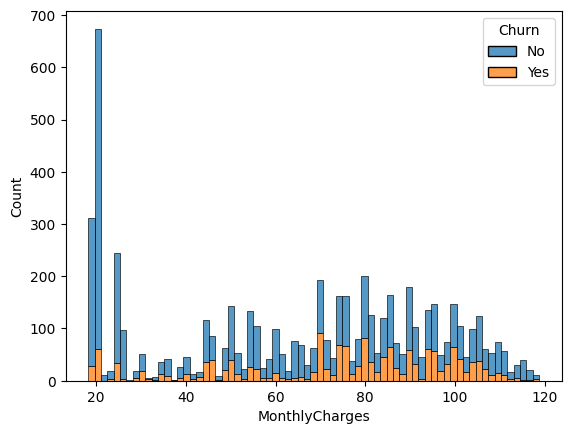

In [12]:
sns.histplot(data=data_df, x='MonthlyCharges', bins=71, hue='Churn', multiple='stack')
plt.show()

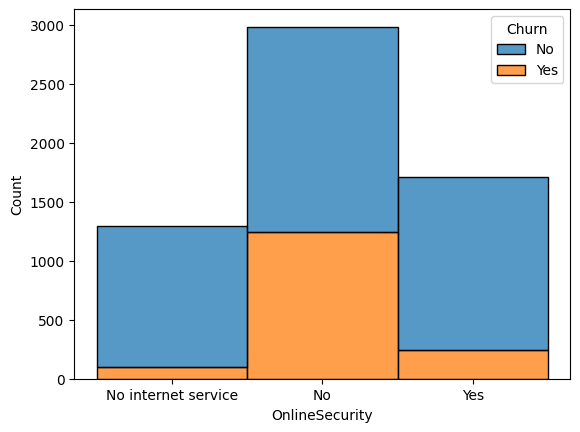

In [13]:
sns.histplot(data=data_df, x='OnlineSecurity', bins=71, hue='Churn', multiple='stack')
plt.show()

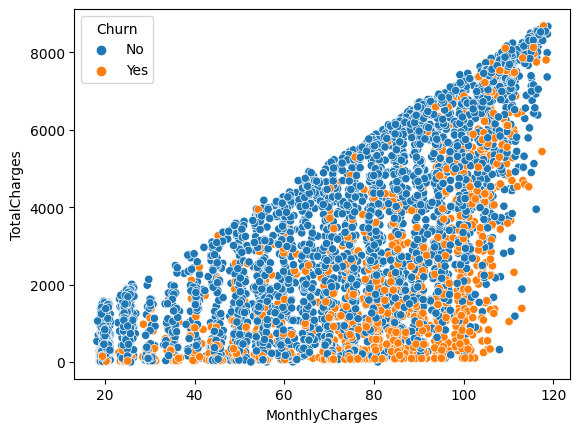

In [14]:
sns.scatterplot(data=data_df, x='MonthlyCharges', y='TotalCharges',hue='Churn' )
plt.show()

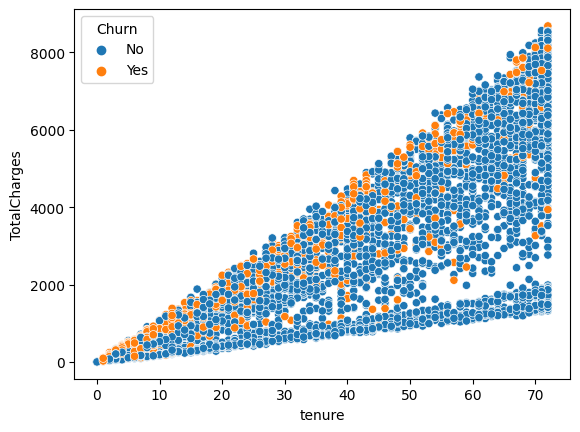

In [15]:
sns.scatterplot(data=data_df, y='TotalCharges', x='tenure',hue='Churn' )
plt.show()

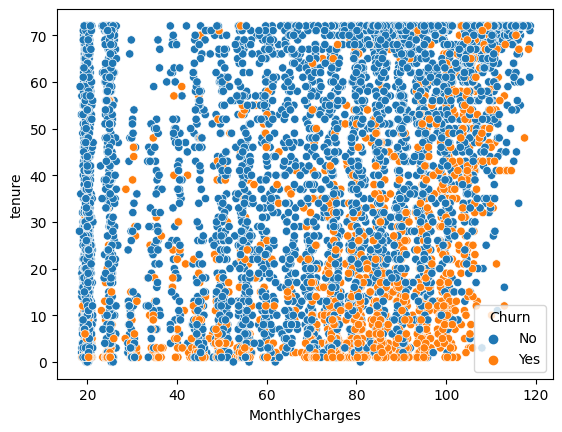

In [16]:
sns.scatterplot(data=data_df, x='MonthlyCharges', y='tenure',hue='Churn' )
plt.show()

In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   object 
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [18]:
'''df["num_services"] = (
    df["PhoneService"].apply(lambda x: 1 if x == "Yes" else 0 )+
    df["MultipleLines"].apply(lambda x: 1 if x == "Yes" else 0 ) +
    df["InternetService"].apply(lambda x: 0 if x == "No" else 1 ) +
    df["OnlineSecurity"].apply(lambda x: 1 if x == "Yes" else 0 ) +
    df["OnlineBackup"].apply(lambda x: 1 if x == "Yes" else 0 ) +
    df["DeviceProtection"].apply(lambda x: 1 if x == "Yes" else 0 ) +
    df["TechSupport"].apply(lambda x: 1 if x == "Yes" else 0 ) +
    df["StreamingTV"].apply(lambda x: 1 if x == "Yes" else 0 ) +
    df["StreamingMovies"].apply(lambda x: 1 if x == "Yes" else 0 )
)'''

'df["num_services"] = (\n    df["PhoneService"].apply(lambda x: 1 if x == "Yes" else 0 )+\n    df["MultipleLines"].apply(lambda x: 1 if x == "Yes" else 0 ) +\n    df["InternetService"].apply(lambda x: 0 if x == "No" else 1 ) +\n    df["OnlineSecurity"].apply(lambda x: 1 if x == "Yes" else 0 ) +\n    df["OnlineBackup"].apply(lambda x: 1 if x == "Yes" else 0 ) +\n    df["DeviceProtection"].apply(lambda x: 1 if x == "Yes" else 0 ) +\n    df["TechSupport"].apply(lambda x: 1 if x == "Yes" else 0 ) +\n    df["StreamingTV"].apply(lambda x: 1 if x == "Yes" else 0 ) +\n    df["StreamingMovies"].apply(lambda x: 1 if x == "Yes" else 0 )\n)'

In [19]:
data_df['Churn'].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

In [20]:
data_df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot: >

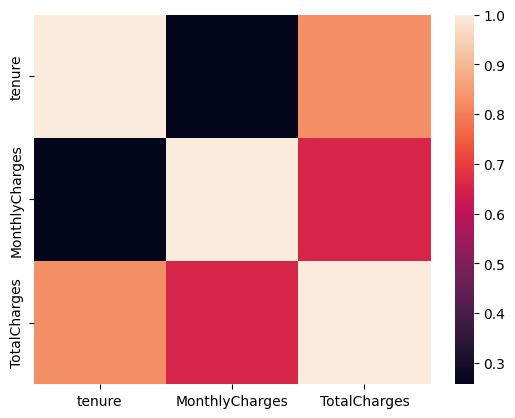

In [21]:
correlation = data_df.drop(columns='Unnamed: 0').corr()
sns.heatmap(correlation)

In [22]:
df_no_missing = data_df.dropna(subset=['TotalCharges'])
df_no_missing.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        5986 non-null   bool 
 1   customerID        5986 non-null   bool 
 2   gender            5986 non-null   bool 
 3   SeniorCitizen     5986 non-null   bool 
 4   Partner           5986 non-null   bool 
 5   Dependents        5986 non-null   bool 
 6   tenure            5986 non-null   bool 
 7   PhoneService      5986 non-null   bool 
 8   MultipleLines     5986 non-null   bool 
 9   InternetService   5986 non-null   bool 
 10  OnlineSecurity    5986 non-null   bool 
 11  OnlineBackup      5986 non-null   bool 
 12  DeviceProtection  5986 non-null   bool 
 13  TechSupport       5986 non-null   bool 
 14  StreamingTV       5986 non-null   bool 
 15  StreamingMovies   5986 non-null   bool 
 16  Contract          5986 non-null   bool 
 17  PaperlessBilling  5986 non-null  

In [23]:
X = df_no_missing.drop(columns = ['Unnamed: 0', 'customerID', 'Churn'])
y = df_no_missing['Churn']

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   object 
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [25]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4190, 19), (1796, 19), (4190,), (1796,))

In [26]:
from pycaret.classification import *

In [27]:
clf = setup(data=pd.concat([X_train, y_train], axis=1),
            target = 'Churn',
            session_id=42,
            #normalize=True,
            test_data=pd.concat([X_test, y_test], axis=1),
            experiment_name='Test_1',
            n_jobs=-1)

,Description,Value
0,Session id,42
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(5986, 20)"
5,Transformed data shape,"(5986, 41)"
6,Transformed train set shape,"(4190, 41)"
7,Transformed test set shape,"(1796, 41)"
8,Ordinal features,6
9,Numeric features,3


In [28]:
X_train_transformed = get_config('X_train_transformed')
X_train_transformed

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No,MultipleLines_Yes,MultipleLines_No phone service,InternetService_No,...,Contract_One year,Contract_Two year,Contract_Month-to-month,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges
3499,1.0,0.0,0.0,0.0,27.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.100000,562.599976
579,1.0,0.0,0.0,0.0,63.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,104.500000,6590.799805
3722,1.0,0.0,1.0,0.0,71.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,108.599998,7690.899902
247,0.0,0.0,1.0,1.0,12.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33.150002,444.750000
5154,1.0,0.0,1.0,0.0,14.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,86.099998,1235.550049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,69.400002,69.400002
4496,1.0,0.0,0.0,0.0,10.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,19.750000,208.250000
3202,1.0,0.0,1.0,1.0,15.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,20.000000,288.049988
782,1.0,0.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80.000000,5040.200195


In [29]:
Best_model = compare_models(fold=3, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8024,0.8411,0.8024,0.7942,0.7965,0.4653,0.4686,5.9300
lda,Linear Discriminant Analysis,0.7976,0.8355,0.7976,0.7907,0.7931,0.4590,0.4610,0.5133
ada,Ada Boost Classifier,0.7976,0.8395,0.7976,0.7896,0.7922,0.4549,0.4574,0.5967
gbc,Gradient Boosting Classifier,0.8005,0.8419,0.8005,0.7903,0.7921,0.4501,0.4559,1.2667
ridge,Ridge Classifier,0.8002,0.0000,0.8002,0.7897,0.7915,0.4480,0.4541,0.3267
lightgbm,Light Gradient Boosting Machine,0.7831,0.8226,0.7831,0.7734,0.7764,0.4123,0.4154,0.9400
rf,Random Forest Classifier,0.7847,0.8115,0.7847,0.7727,0.7754,0.4056,0.4111,0.7267
xgboost,Extreme Gradient Boosting,0.7683,0.8069,0.7683,0.7589,0.7623,0.3772,0.3792,0.4600
et,Extra Trees Classifier,0.7692,0.7866,0.7692,0.7570,0.7608,0.3692,0.3728,0.7167
knn,K Neighbors Classifier,0.7663,0.7390,0.7663,0.7499,0.7535,0.3437,0.3509,0.8667


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [30]:
categorical_features = list(X.drop(columns=['TotalCharges', 'MonthlyCharges', 'tenure']).columns)
numerical_features = ['TotalCharges', 'MonthlyCharges', 'tenure']

In [31]:
clf = setup(data=pd.concat([X_train, y_train], axis=1),
            target = 'Churn',
            session_id=42,
            numeric_features=['TotalCharges', 'MonthlyCharges', 'tenure'],
            categorical_features=categorical_features,
            normalize=True,
            test_data=pd.concat([X_test, y_test], axis=1),
            experiment_name='Test_1',
            n_jobs=-1)

,Description,Value
0,Session id,42
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(5986, 20)"
5,Transformed data shape,"(5986, 41)"
6,Transformed train set shape,"(4190, 41)"
7,Transformed test set shape,"(1796, 41)"
8,Ordinal features,6
9,Numeric features,3


In [32]:
X_train_transformed = get_config('X_train_transformed')
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4190 entries, 3499 to 5829
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   4190 non-null   float64
 1   SeniorCitizen                            4190 non-null   float64
 2   Partner                                  4190 non-null   float64
 3   Dependents                               4190 non-null   float64
 4   tenure                                   4190 non-null   float64
 5   PhoneService                             4190 non-null   float64
 6   MultipleLines_No                         4190 non-null   float64
 7   MultipleLines_Yes                        4190 non-null   float64
 8   MultipleLines_No phone service           4190 non-null   float64
 9   InternetService_No                       4190 non-null   float64
 10  InternetService_Fiber optic              4190

In [33]:
X_train_transformed = get_config('X_test_transformed')
X_train_transformed

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No,MultipleLines_Yes,MultipleLines_No phone service,InternetService_No,...,Contract_One year,Contract_Two year,Contract_Month-to-month,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges
3564,0.970831,-0.444393,-0.976412,1.510340,-1.280924,0.333333,1.048928,-0.857734,-0.333333,-0.530051,...,-0.520805,-0.562099,0.910876,0.830781,-0.521546,-0.526355,-0.712556,1.817099,-0.489235,-0.983100
4620,-1.030045,-0.444393,1.024158,1.510340,1.545014,0.333333,1.048928,-0.857734,-0.333333,-0.530051,...,1.920104,-0.562099,-1.097845,-1.203686,-0.521546,1.899858,-0.712556,-0.550328,0.309314,1.294986
4312,0.970831,-0.444393,-0.976412,-0.662102,1.299280,0.333333,-0.953354,1.165862,-0.333333,-0.530051,...,1.920104,-0.562099,-1.097845,0.830781,-0.521546,1.899858,-0.712556,-0.550328,1.317400,2.029406
1187,-1.030045,-0.444393,-0.976412,-0.662102,0.070612,0.333333,1.048928,-0.857734,-0.333333,1.886612,...,-0.520805,-0.562099,0.910876,-1.203686,-0.521546,-0.526355,-0.712556,1.817099,-1.464323,-0.708579
4990,0.970831,-0.444393,1.024158,1.510340,-0.543722,0.333333,-0.953354,1.165862,-0.333333,-0.530051,...,1.920104,-0.562099,-1.097845,0.830781,-0.521546,-0.526355,1.403398,-0.550328,1.195308,-0.179026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,-1.030045,-0.444393,-0.976412,-0.662102,0.357301,0.333333,-0.953354,1.165862,-0.333333,-0.530051,...,-0.520805,-0.562099,0.910876,0.830781,1.917378,-0.526355,-0.712556,-0.550328,1.642430,0.988953
5489,0.970831,-0.444393,-0.976412,-0.662102,-1.280924,0.333333,1.048928,-0.857734,-0.333333,-0.530051,...,-0.520805,-0.562099,0.910876,0.830781,-0.521546,-0.526355,1.403398,-0.550328,-0.631126,-0.984994
3115,-1.030045,-0.444393,-0.976412,1.510340,-0.953279,0.333333,1.048928,-0.857734,-0.333333,-0.530051,...,-0.520805,-0.562099,0.910876,-1.203686,1.917378,-0.526355,-0.712556,-0.550328,0.932975,-0.621792
5506,-1.030045,-0.444393,-0.976412,-0.662102,-1.239968,0.333333,-0.953354,1.165862,-0.333333,-0.530051,...,-0.520805,-0.562099,0.910876,0.830781,-0.521546,-0.526355,1.403398,-0.550328,1.003920,-0.918356


In [34]:
compare_models(fold=3, sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8033,0.8422,0.8033,0.7950,0.7972,0.4669,0.4703,0.5300
ridge,Ridge Classifier,0.8005,0.0000,0.8005,0.7899,0.7917,0.4485,0.4546,0.3300
gbc,Gradient Boosting Classifier,0.8005,0.8419,0.8005,0.7903,0.7921,0.4501,0.4559,1.2900
ada,Ada Boost Classifier,0.7976,0.8395,0.7976,0.7896,0.7922,0.4549,0.4574,0.5333
lda,Linear Discriminant Analysis,0.7976,0.8355,0.7976,0.7907,0.7931,0.4590,0.4610,0.5500
rf,Random Forest Classifier,0.7845,0.8113,0.7845,0.7724,0.7751,0.4044,0.4101,0.7267
lightgbm,Light Gradient Boosting Machine,0.7823,0.8233,0.7823,0.7723,0.7754,0.4094,0.4125,0.6133
et,Extra Trees Classifier,0.7699,0.7865,0.7699,0.7578,0.7615,0.3710,0.3747,0.8000
xgboost,Extreme Gradient Boosting,0.7683,0.8069,0.7683,0.7589,0.7623,0.3772,0.3792,0.4600
knn,K Neighbors Classifier,0.7587,0.7676,0.7587,0.7538,0.7557,0.3666,0.3674,0.6433


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
from imblearn.over_sampling import SMOTENC

In [36]:
categorical_features = list(X_train.drop(columns=['TotalCharges', 'MonthlyCharges', 'tenure']).columns)
numerical_features = ['TotalCharges', 'MonthlyCharges', 'tenure']
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [37]:
# Logistic regression with best parameters from pycaret
logi = LogisticRegression(C=1.0,
                          dual=False,
                          fit_intercept=True,
                          intercept_scaling=1,
                          max_iter=1000,
                          multi_class='auto',
                          penalty='l2',
                          random_state=42,
                          solver='lbfgs',
                          tol=0.0001,
                          verbose=0,
                          class_weight='balanced')
categorical_features = X.select_dtypes(include=['object']).columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='constant', fill_value=0), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])


pipeline = Pipeline([
                     ('preprocessor', preprocessor),
                     ('classifier', logi)
                    ])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7511135857461024
              precision    recall  f1-score   support

          No       0.90      0.74      0.81      1320
         Yes       0.52      0.78      0.62       476

    accuracy                           0.75      1796
   macro avg       0.71      0.76      0.72      1796
weighted avg       0.80      0.75      0.76      1796

[[979 341]
 [106 370]]


In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from imblearn.pipeline import Pipeline as imbpipeline


In [38]:
# added smote


# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='constant', fill_value=0), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Combine preprocessing, SMOTE-NC, and classifier in an imblearn pipeline
categorical_indices = [X.columns.get_loc(col) for col in categorical_features]

# Complete the imbalanced-learn pipeline
pipeline = imbpipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTENC(sampling_strategy='auto', categorical_features=categorical_indices, random_state=42)),
    ('classifier', LogisticRegression(C=1.0, dual=False, fit_intercept=True,
                                      intercept_scaling=1, max_iter=1000,
                                      multi_class='auto', penalty='l2',
                                      random_state=42, solver='lbfgs',
                                      tol=0.0001, verbose=0,
                                      class_weight='balanced'))
])
# Split your data into train and test sets (assuming X_train, X_test, y_train, y_test are defined)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7544543429844098
Confusion Matrix:
[[1005  315]
 [ 126  350]]
Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.76      0.82      1320
         Yes       0.53      0.74      0.61       476

    accuracy                           0.75      1796
   macro avg       0.71      0.75      0.72      1796
weighted avg       0.79      0.75      0.77      1796



In [56]:
# changed class weights 1 to 2

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='constant', fill_value=0), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Combine preprocessing, SMOTE-NC, and classifier in an imblearn pipeline
categorical_indices = [X.columns.get_loc(col) for col in categorical_features]

# Complete the imbalanced-learn pipeline
pipeline = imbpipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTENC(sampling_strategy='auto', categorical_features=categorical_indices, random_state=42)),
    ('classifier', LogisticRegression(C=1.0, dual=False, fit_intercept=True,
                                      intercept_scaling=1, max_iter=1000,
                                      multi_class='auto', penalty='l2',
                                      random_state=42, solver='lbfgs',
                                      tol=0.0001, verbose=0,
                                      class_weight={'No': 1, "Yes": 2}))
])
# Split your data into train and test sets (assuming X_train, X_test, y_train, y_test are defined)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.6937639198218263
Confusion Matrix:
[[830 490]
 [ 60 416]]
Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.63      0.75      1320
         Yes       0.46      0.87      0.60       476

    accuracy                           0.69      1796
   macro avg       0.70      0.75      0.68      1796
weighted avg       0.81      0.69      0.71      1796



In [137]:


pipeline = imbpipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTENC(sampling_strategy='auto', categorical_features=categorical_indices, random_state=42)),
    ('classifier', LogisticRegression(
                                      random_state=42,
                                      ))])
# Define parameter grid for the Logistic Regression
param_grid = {
    #'classifier__max_iter': [1000],
    #'classifier__penalty': ['l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjust the range as needed
    'classifier__class_weight': [{"No": 1, "Yes": 2}, {"No": 1, "Yes": 3}, {"No": 1, "Yes": 4}]  # Experiment with different class weights
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, )  # Use an appropriate scoring metric

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         SimpleImputer(add_indicator=False,
                                                                                       copy=True,
                                                                                       fill_value=0,
                                                                                       keep_empty_features=False,
                                                                                       missing_values=nan,
                                                                                       strategy='constant',
                                                                                       verbose='deprecated'),
                                                                         ['To...
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=42,
                                                           solver='lbfgs',
                                                           tol=0.0001,
                                                           verbose=0,
                                                           warm_start=False))],
                                verbose=False),
             n_jobs=None,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__class_weight': [{'No': 1, 'Yes': 2},
                                                      {'No': 1, 'Yes': 3},
                                                      {'No': 1, 'Yes': 4}]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [138]:
# Get the best parameters
best_params = grid_search.best_params_

# Print the best parametersg
print("Best Parameters:", best_params)

# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Best Parameters: {'classifier__C': 0.1, 'classifier__class_weight': {'No': 1, 'Yes': 2}}
Accuracy: 0.7010022271714922
Confusion Matrix:
[[848 472]
 [ 65 411]]
Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.64      0.76      1320
         Yes       0.47      0.86      0.60       476

    accuracy                           0.70      1796
   macro avg       0.70      0.75      0.68      1796
weighted avg       0.81      0.70      0.72      1796



In [139]:
def grid_search_results_to_dataframe(grid_search_results):
    # Extract relevant information from the grid search results
    columns = list(grid_search_results.keys())
    data = {column: grid_search_results[column] for column in columns}

    # Convert to DataFrame
    df = pd.DataFrame(data).drop(columns=['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score',])

    return df

In [140]:
grid_search_results = grid_search.cv_results_
df = grid_search_results_to_dataframe(grid_search_results)

# Display the DataFrame
df.sort_values(by='rank_test_score')

,param_classifier__C,param_classifier__class_weight,params,mean_test_score,std_test_score,rank_test_score
6,0.1,"{'No': 1, 'Yes': 2}","{'classifier__C': 0.1, 'classifier__class_weig...",0.692601,0.011436,1
12,10,"{'No': 1, 'Yes': 2}","{'classifier__C': 10, 'classifier__class_weigh...",0.690931,0.015777,2
15,100,"{'No': 1, 'Yes': 2}","{'classifier__C': 100, 'classifier__class_weig...",0.690453,0.013556,3
9,1,"{'No': 1, 'Yes': 2}","{'classifier__C': 1, 'classifier__class_weight...",0.690453,0.014666,3
3,0.01,"{'No': 1, 'Yes': 2}","{'classifier__C': 0.01, 'classifier__class_wei...",0.686635,0.012597,5
0,0.001,"{'No': 1, 'Yes': 2}","{'classifier__C': 0.001, 'classifier__class_we...",0.664678,0.013916,6
16,100,"{'No': 1, 'Yes': 3}","{'classifier__C': 100, 'classifier__class_weig...",0.648210,0.015382,7
10,1,"{'No': 1, 'Yes': 3}","{'classifier__C': 1, 'classifier__class_weight...",0.647971,0.015813,8
7,0.1,"{'No': 1, 'Yes': 3}","{'classifier__C': 0.1, 'classifier__class_weig...",0.645107,0.013429,9
13,10,"{'No': 1, 'Yes': 3}","{'classifier__C': 10, 'classifier__class_weigh...",0.643914,0.011159,10
